<a href="https://colab.research.google.com/github/stenoe/FEDS/blob/main/notebooks/class_notebooks/course2025_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning

building an classifier

## The general steps in ML/AI modelk training

1.  Load the data
2.  Clean the data
3.  Prepare the data, split in training and testing datasets
4.  Create or choose a model
5.  Build a training loop (or train the model)
6.  Make predictions (test dataset!)
7.  Evaluate accuracy (decide to change the model or tune model hyperparameters)
8.  Use the model on new data

In [1]:
import requests
from pathlib import Path

# setup path to data folder
data_path = Path('data/')

# If the data folder doesn't exist we create it
if data_path.is_dir():
  print(f"{data_path} directory already exists... skipping creation")
else:
  data_path.mkdir(parents=True, exist_ok=True)
  print(f"{data_path} does not exists, creating it...")

  # Download temperature anomaly data
  with open(data_path / "music.csv", "wb") as f:
    request = requests.get("https://raw.githubusercontent.com/stenoe/FEDS/refs/heads/main/data/music.csv")
    print("Downloading data...")
    f.write(request.content)
    print("-- done!")


data does not exists, creating it...
-- done!


## Let's train the computer to make decisions

We will use ``sklearn.DecisionTreeClassifier``

In [2]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


### Step 1 -- Load data

After the data have been loaded it's good practice to inspect the data. You may want to know the shape of the data matrix, see which are features and which are targets etc.

Sometimes. It's also good to get a basic statistics of the data, e.g. the ``pandas.describe()`` function is useful.

In [3]:
# STEP 1 - load data

df = pd.read_csv("data/music.csv")
df.shape

(18, 3)

In [4]:
df

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


### Step 2 -- Prepare data

Beside cleaning the datafrom possible corrupted data sets and missing data that could influence the training process negatively it is important to transfer the data to the right shapes for input anf output of the chosen model.

If you read about the ``DecisionTreeClasifier()`` class the ``fit(X, y)`` method takes in a matrix ``X`` of shape (n_samples, n_features) and a vector ``y`` of shape (n_samples), the target or "labels" we train the system on.



In [5]:
# STEP 2 -- prepare data

X = df.drop(columns=['genre']).values  # feature vector with feature age and gender, 1=male, 0=female
y = df['genre'].values # target vector

In [6]:
y

array(['HipHop', 'HipHop', 'HipHop', 'Jazz', 'Jazz', 'Jazz', 'Classical',
       'Classical', 'Classical', 'Dance', 'Dance', 'Dance', 'Acoustic',
       'Acoustic', 'Acoustic', 'Classical', 'Classical', 'Classical'],
      dtype=object)

### Step 4a -- Create a baseline model - no test/train split yet

In [7]:
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

### Step 8a -- Predict unknown features - test if the baseline model works

use a male age 21 and female age 22, these are not in the original dataset! (point 8!)

In [8]:
predictions = model.predict([[21, 1], [22, 0]])
predictions

array(['HipHop', 'Dance'], dtype=object)

## check how accurate are our predictions

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [21]:
X_test

array([[31,  1],
       [23,  1],
       [20,  1],
       [26,  1]])

In [22]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
from sklearn.metrics import accuracy_score

predictions2 = model.predict(X_test)
score = accuracy_score(y_test, predictions2)
score

1.0

In [24]:
predictions2, y_test

(array(['Classical', 'HipHop', 'HipHop', 'Jazz'], dtype=object),
 array(['Classical', 'HipHop', 'HipHop', 'Jazz'], dtype=object))

In [25]:
scores = []

for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, pred))
    print(scores[i])

print(f"\naverage score: {np.mean(scores)}")

1.0
1.0
1.0
0.25
0.5
1.0
1.0
1.0
1.0
0.5
1.0
0.5
1.0
1.0
0.75
0.75
0.75
1.0
1.0
1.0

average score: 0.85


In [26]:
scores = []

for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, pred))
    print(scores[i])

print(f"\naverage score: {np.round(np.mean(scores),2)}")


0.3333333333333333
0.4
0.13333333333333333
0.2
0.4
0.4
0.26666666666666666
0.26666666666666666
0.2
0.4
0.26666666666666666
0.2
0.06666666666666667
0.4
0.4
0.3333333333333333
0.2
0.3333333333333333
0.4
0.2

average score: 0.29


In [27]:
pred, y_test

(array(['Jazz', 'Acoustic', 'Jazz', 'Jazz', 'Jazz', 'Jazz', 'Jazz',
        'Classical', 'Acoustic', 'Acoustic', 'Jazz', 'Acoustic', 'Jazz',
        'Jazz', 'Classical'], dtype=object),
 array(['Acoustic', 'Jazz', 'Dance', 'HipHop', 'Jazz', 'HipHop', 'Dance',
        'Classical', 'Classical', 'Classical', 'Dance', 'Classical',
        'HipHop', 'Acoustic', 'Classical'], dtype=object))

## Visualize the decision tree

In [28]:
import graphviz

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [34]:
# ensure that the model is with a trainig:test with 80:20 % to have a reasonable large graph
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) # test_size=0.8 makes a small graph!
model.fit(X_train, y_train)

dot_data = tree.export_graphviz(model,
                                out_file=None,
                                feature_names=["age", "gender"],
                                class_names=sorted(np.unique(y).tolist()),
                                filled=True,
                                rounded=True,
                                special_characters=True
                               )

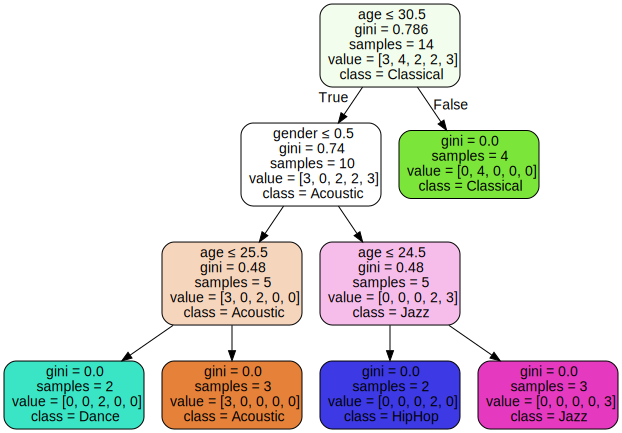

In [35]:
graph = graphviz.Source(dot_data)
graph

In [31]:
df

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance
